## COVID Party Probability
* Calculate the probability that **at least one** person at an event is currently positive for COVID-19  
* Uses county level statistics  
* All data comes from: https://covidactnow.org/us/florida-fl/county/brevard_county?s=1377361


# Definitions:
$$ P(-): \text{Probability of one person being negative}$$
$$ P(+): \text{Probability of one person being positive}$$
$$ N: \text{Number of people at the event}$$
$$ population\ size: \text{County population}$$
$$ \#\ positive\ cases: \text{Number of reported and unreported positive cases in a specific population}$$
$$ FS: \text{Factor of safety}$$
$$ incubation\ period: \text{Length of time in which a person is unknowingly positive}$$   

  
# Derivation:

**The population wide probability of being positive can be estimated by dividing the number of positive cases within a population by the total population size.**  

$$ P(+) = \frac{\#\ positive\ cases}{population\ size} $$  

**We know the probability of being positive and the probability of being negative must sum to 1.** 
  
$$ P(-) = 1 - P(+) $$  
  
**Probability of everybody at an event being negative for COVID-19 is the probability of one person being negative multiplied by the probability of every other person being negative. Or in more simple mathematical terms...**  
  
$$P(all\ -) = P(-)^{N}$$  

**The probability of at least one person being positive for COVID-19 and the probability of everybody at an event must add to 1.**

$$ P(at\ least\ one\ +) = 1 - P(all\ -) $$

**The number of reported positive cases can be looked up using a reliable source such as covidactnow.org. However, the true number of positive cases will always be greater than the reported number of positive cases due to the presence of asymptomatic cases, lags in test reporting, and testing availability. We can account for this uncertainty by using a factor of safety. The factor of safety represents a multiple for how many more positive cases there are above and beyond the reported positive cases. For example, a factor of safety equal to 10 would mean that the true number of positive cases is 10x higher than the number of reported positive cases.**  

**As of the time of this writing it is estimated that a person infected with COVID has an incubation period of 7-14 days before experiencing any symptoms while still being contagious. In order to estimate the number of unknowingly positive people in a population, county level statistics for the length of the incubation period (we will use 10 days) can be used to estimate the number of positive people at a specific time within a population. This should give us a fairly accurate estimate of the prevalence of COVID at the county level.**  

$$ \#\ positive\ cases = FS * daily\ cases * incubation\ period$$

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
daily_cases = 137 # 7 day average of positive cases
n_days = 10 # Number of days
fs = 3 # Factor of safety (factor for how many positive unreported cases there are)
pop = 601942 # Population of Brevard County

n_people = 15 # Number of people at party (come in contact with)

In [14]:
# Calculates probability of at least one person being positive given county level statistics
def calculate_probability(daily_cases, n_people, n_days, safety_factor, county_population):
    
    # Probability of a person being positive
    p_one_pos = safety_factor * daily_cases * n_days / pop

    # Probability of a person being negative
    p_one_neg = 1 - p_one_pos

    # Probability of all people being negative
    p_all_neg = p_one_neg ** n_people

    # Probability of at least one person being positive
    p_at_least_one = (1 - p_all_neg )* 100.0

    return p_at_least_one

In [15]:
p_at_least_one = calculate_probability(daily_cases, n_people, n_days, fs, pop)
print("Probability of at least one covid positive person: {:.2f}%".format(p_at_least_one))

Probability of at least one covid positive person: 9.77%


# Calculate probability with variable factor of safety

In [16]:
# County level statistics
daily_cases = 137 # 7 day average of positive cases (137)
n_days = 10 # Number of days
pop = 601942 # Population of Brevard County

# Variables
n_people = 35 # Number of people at party (come in contact with)
fs = np.linspace(1,10,200) # Variable factor of safety

In [17]:
p_at_least_one = calculate_probability(daily_cases, n_people, n_days, fs, pop)

In [18]:
plt.plot(fs,p_at_least_one)
plt.xlabel("Factor of Safety")
plt.ylabel("P(at least one +)")
plt.title("Probability of at least one positive person at party")
plt.grid(True)
plt.xlim([min(fs),max(fs)])
# plt.ylim([0,100])
plt.show()

# Calculate probability with variable factor of safety and variable event size

In [19]:
# County level statistics
daily_cases = 137 # 7 day average of positive cases (137)
n_days = 10 # Number of days
pop = 601942 # Population of Brevard County

# Variables
n_people = np.linspace(0,35,200) # Number of people at party (come in contact with)
fs = np.linspace(1,10,200) # Variable factor of safety

In [20]:
N_PEOPLE, FS = np.meshgrid(n_people,fs)

In [21]:
p_at_least_one = calculate_probability(daily_cases, N_PEOPLE, n_days, FS, pop)

<IPython.core.display.Javascript object>


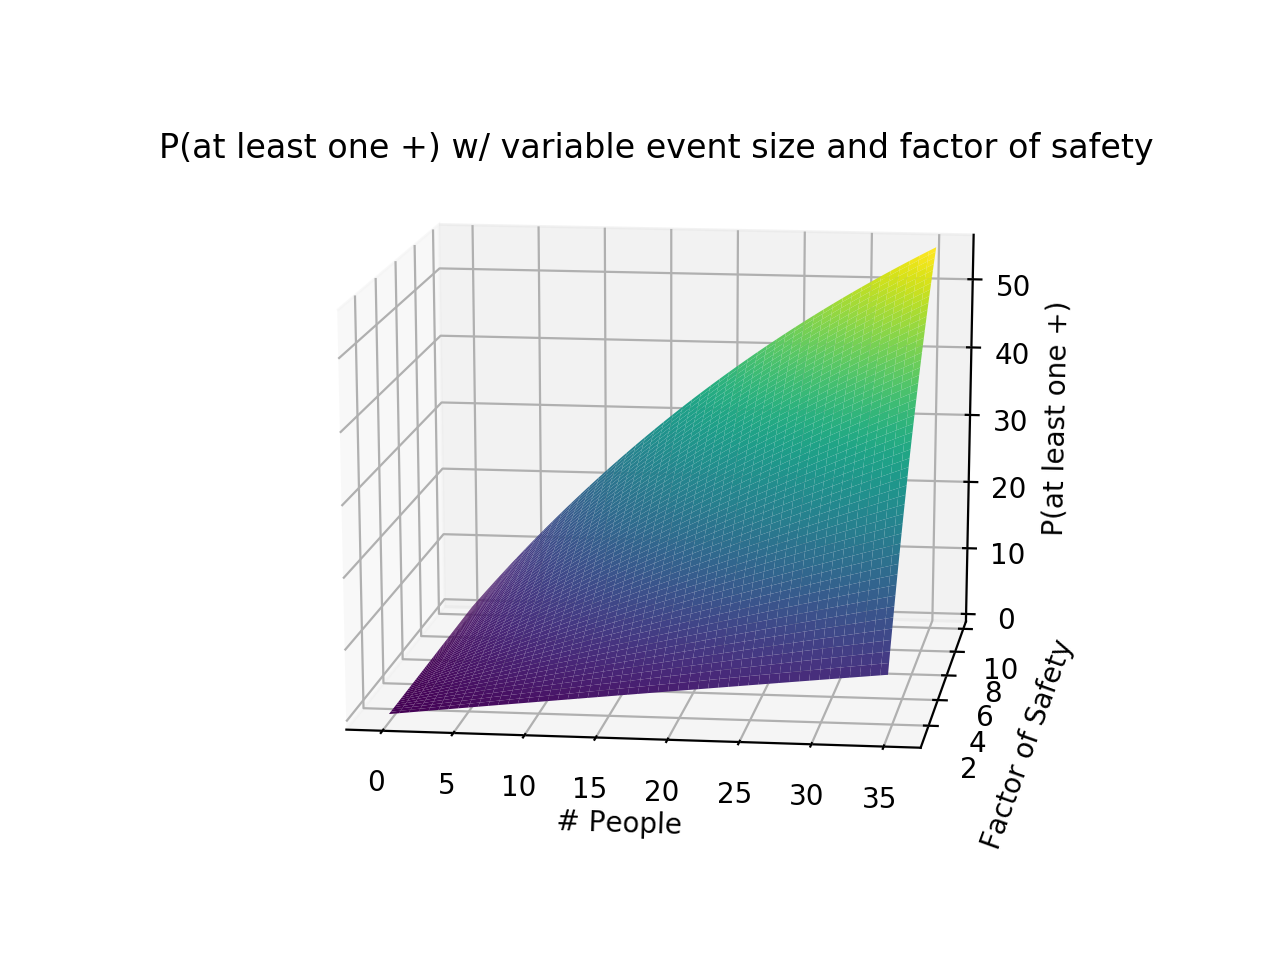

Text(0.5, 0, 'P(at least one +)')

In [22]:
from mpl_toolkits import mplot3d

# To manipulate the 3D plot, uncomment the line below. 
# NOTE: This can sometimes cause issues regenerating plots. 
#       Press the blue power button at the top right of the figure to 'turn off' 
#       the current plot before generating a new plot.

%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(N_PEOPLE, FS, p_at_least_one, cmap='viridis', edgecolor='none')
ax.set_title('P(at least one +) w/ variable event size and factor of safety')
plt.show()
ax.set_xlabel("# People")
ax.set_ylabel("Factor of Safety")
ax.set_zlabel("P(at least one +)")
